In [95]:
# 필요한 라이브러리 설치

import os
import json
import requests
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [96]:
# Open API 데이터 받아오기

api_key = "4c4548414b636865343942706f5157"
file_type = 'json'
service_name = 'BukChonInOutPeopleInfo'
url = f"http://openapi.seoul.go.kr:8088/{api_key}/{file_type}/{service_name}/1/1000/"

res = requests.get(url)
data = res.text

# 딕셔너리로 변환
dict_data = json.loads(data)
dict_data['BukChonInOutPeopleInfo']

{'list_total_count': 29328,
 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
 'row': [{'DEVICEID': 2.0,
   'DEVICENAME': '계동길 69',
   'DESCRIPTION': '계동교회 앞',
   'STARTTIME': '2022-11-30 21:10:41',
   'ENDTIME': '2022-11-30 21:20:41',
   'INCOUNT': 9386.0,
   'OUTCOUNT': 13749.0},
  {'DEVICEID': 1.0,
   'DEVICENAME': '율곡로3길 50',
   'DESCRIPTION': '덕성여고 앞',
   'STARTTIME': '2022-11-30 21:10:41',
   'ENDTIME': '2022-11-30 21:20:41',
   'INCOUNT': 7903.0,
   'OUTCOUNT': 5279.0},
  {'DEVICEID': 2.0,
   'DEVICENAME': '계동길 69',
   'DESCRIPTION': '계동교회 앞',
   'STARTTIME': '2022-11-30 21:20:41',
   'ENDTIME': '2022-11-30 21:30:41',
   'INCOUNT': 9398.0,
   'OUTCOUNT': 13776.0},
  {'DEVICEID': 1.0,
   'DEVICENAME': '율곡로3길 50',
   'DESCRIPTION': '덕성여고 앞',
   'STARTTIME': '2022-11-30 21:20:41',
   'ENDTIME': '2022-11-30 21:30:41',
   'INCOUNT': 7927.0,
   'OUTCOUNT': 5312.0},
  {'DEVICEID': 2.0,
   'DEVICENAME': '계동길 69',
   'DESCRIPTION': '계동교회 앞',
   'STARTTIME': '2022-11-30 21:30:41',

In [97]:
# 데이터프레임으로 변환

df = pd.DataFrame(dict_data['BukChonInOutPeopleInfo']['row'])
df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0
...,...,...,...,...,...,...,...
995,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:00:42,2022-10-28 15:10:42,2937.0,3324.0
996,2.0,계동길 69,계동교회 앞,2022-10-28 15:10:42,2022-10-28 15:20:42,16067.0,16449.0
997,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:10:42,2022-10-28 15:20:42,3090.0,3443.0
998,2.0,계동길 69,계동교회 앞,2022-10-28 15:20:42,2022-10-28 15:30:42,16282.0,16699.0


In [98]:
# 데이터클리닝

# 결측데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DEVICEID     1000 non-null   float64
 1   DEVICENAME   1000 non-null   object 
 2   DESCRIPTION  1000 non-null   object 
 3   STARTTIME    1000 non-null   object 
 4   ENDTIME      1000 non-null   object 
 5   INCOUNT      1000 non-null   float64
 6   OUTCOUNT     1000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 54.8+ KB


In [99]:
# 중복데이터 확인

df.duplicated().sum()

0

In [100]:
# 월별 칼럼 추가
df['ENDTIME']= pd.to_datetime(df['ENDTIME'])
df['MONTH'] = df['ENDTIME'].dt.month

# 요일별 칼럼 추가
df['DAY'] = df['ENDTIME'].dt.dayofweek
df.loc[df['DAY'] == 0, 'DAY'] = '월요일'
df.loc[df['DAY'] == 1, 'DAY'] = '화요일'
df.loc[df['DAY'] == 2, 'DAY'] = '수요일'
df.loc[df['DAY'] == 3, 'DAY'] = '목요일'
df.loc[df['DAY'] == 4, 'DAY'] = '금요일'
df.loc[df['DAY'] == 5, 'DAY'] = '토요일'
df.loc[df['DAY'] == 6, 'DAY'] = '일요일'

# 시간 칼럼 추가
df['HOUR'] = df['ENDTIME'].dt.hour

df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,MONTH,DAY,HOUR
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0,11,수요일,21
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0,11,수요일,21
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0,11,수요일,21
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0,11,수요일,21
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0,11,수요일,21
...,...,...,...,...,...,...,...,...,...,...
995,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:00:42,2022-10-28 15:10:42,2937.0,3324.0,10,금요일,15
996,2.0,계동길 69,계동교회 앞,2022-10-28 15:10:42,2022-10-28 15:20:42,16067.0,16449.0,10,금요일,15
997,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-28 15:10:42,2022-10-28 15:20:42,3090.0,3443.0,10,금요일,15
998,2.0,계동길 69,계동교회 앞,2022-10-28 15:20:42,2022-10-28 15:30:42,16282.0,16699.0,10,금요일,15


In [101]:
# 필요없는 칼럼 제거

df_cleaned = df.drop(columns=['DEVICENAME','STARTTIME','ENDTIME'])
df_cleaned.rename(columns={'DESCRIPTION':'LOCATION'}, inplace=True)
df_cleaned

,DEVICEID,LOCATION,INCOUNT,OUTCOUNT,MONTH,DAY,HOUR
0,2.0,계동교회 앞,9386.0,13749.0,11,수요일,21
1,1.0,덕성여고 앞,7903.0,5279.0,11,수요일,21
2,2.0,계동교회 앞,9398.0,13776.0,11,수요일,21
3,1.0,덕성여고 앞,7927.0,5312.0,11,수요일,21
4,2.0,계동교회 앞,9414.0,13800.0,11,수요일,21
...,...,...,...,...,...,...,...
995,4.0,삼청파출소 사잇길,2937.0,3324.0,10,금요일,15
996,2.0,계동교회 앞,16067.0,16449.0,10,금요일,15
997,4.0,삼청파출소 사잇길,3090.0,3443.0,10,금요일,15
998,2.0,계동교회 앞,16282.0,16699.0,10,금요일,15


In [102]:
# 1번 카메라

df_1 = df_cleaned[df_cleaned['DEVICEID']==1.0]
df_1

,DEVICEID,LOCATION,INCOUNT,OUTCOUNT,MONTH,DAY,HOUR
1,1.0,덕성여고 앞,7903.0,5279.0,11,수요일,21
3,1.0,덕성여고 앞,7927.0,5312.0,11,수요일,21
5,1.0,덕성여고 앞,7977.0,5347.0,11,수요일,21
8,1.0,덕성여고 앞,7993.0,5376.0,11,수요일,21
9,1.0,덕성여고 앞,8167.0,5555.0,11,수요일,23
...,...,...,...,...,...,...,...
875,1.0,덕성여고 앞,8930.0,6837.0,12,목요일,23
877,1.0,덕성여고 앞,105.0,26.0,12,금요일,3
879,1.0,덕성여고 앞,148.0,58.0,12,금요일,5
883,1.0,덕성여고 앞,1702.0,448.0,12,목요일,9


In [103]:
# 2번 카메라

df_2 = df_cleaned[df_cleaned['DEVICEID']==2.0]
df_2

,DEVICEID,LOCATION,INCOUNT,OUTCOUNT,MONTH,DAY,HOUR
0,2.0,계동교회 앞,9386.0,13749.0,11,수요일,21
2,2.0,계동교회 앞,9398.0,13776.0,11,수요일,21
4,2.0,계동교회 앞,9414.0,13800.0,11,수요일,21
6,2.0,계동교회 앞,9625.0,14105.0,11,수요일,23
7,2.0,계동교회 앞,9441.0,13852.0,11,수요일,21
...,...,...,...,...,...,...,...
990,2.0,계동교회 앞,15301.0,15649.0,10,금요일,14
992,2.0,계동교회 앞,15551.0,15916.0,10,금요일,15
994,2.0,계동교회 앞,15820.0,16198.0,10,금요일,15
996,2.0,계동교회 앞,16067.0,16449.0,10,금요일,15


In [104]:
# 3번 카메라
# 데이터 없음

df_3 = df_cleaned[df_cleaned['DEVICEID']==3.0]
df_3

,DEVICEID,LOCATION,INCOUNT,OUTCOUNT,MONTH,DAY,HOUR


In [105]:
# 4번 카메라

df_4 = df_cleaned[df_cleaned['DEVICEID']==4.0]
df_4

,DEVICEID,LOCATION,INCOUNT,OUTCOUNT,MONTH,DAY,HOUR
467,4.0,삼청파출소 사잇길,5.0,11.0,10,목요일,0
473,4.0,삼청파출소 사잇길,7.0,13.0,10,목요일,0
475,4.0,삼청파출소 사잇길,7.0,30.0,10,목요일,0
477,4.0,삼청파출소 사잇길,14.0,39.0,10,목요일,0
479,4.0,삼청파출소 사잇길,14.0,39.0,10,목요일,0
...,...,...,...,...,...,...,...
991,4.0,삼청파출소 사잇길,2730.0,3085.0,10,금요일,14
993,4.0,삼청파출소 사잇길,2826.0,3222.0,10,금요일,15
995,4.0,삼청파출소 사잇길,2937.0,3324.0,10,금요일,15
997,4.0,삼청파출소 사잇길,3090.0,3443.0,10,금요일,15


In [170]:
# 월별 평균 유동인구 집계 - 전체 지역

outcnt = df_cleaned.groupby('MONTH')['OUTCOUNT'].mean()
incnt = df_cleaned.groupby('MONTH')['INCOUNT'].mean()

df_month = pd.concat([incnt, outcnt],axis=1,keys=['INCOUNT','OUTCOUNT']).reset_index()     # 멀티인덱스 초기화
df_month['COUNTS'] = (df_month['INCOUNT'] + df_month['OUTCOUNT']) / 2
df_month = df_month.reindex(index=[1,2,3,0])      # 시간순으로 인덱스 정렬
df_month

,MONTH,INCOUNT,OUTCOUNT,COUNTS
1,10,4732.050847,5105.711864,4918.881356
2,11,8300.264706,9162.588235,8731.426471
3,12,2892.817623,3097.090164,2994.953893
0,1,7.500000,3.000000,5.250000


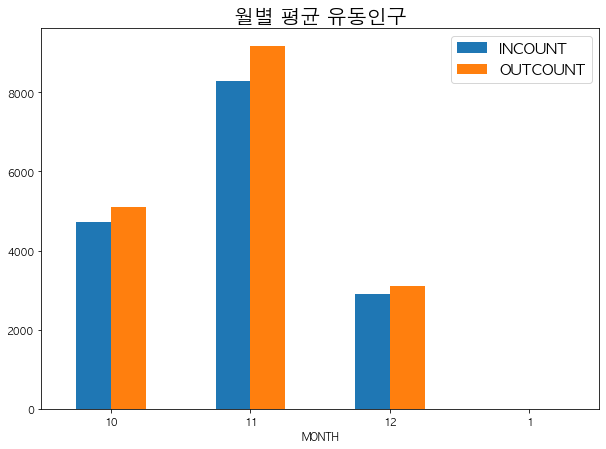

In [171]:
# 전체 월별 평균 유동인구 집계 - 시각화

# 한글 폰트 설정
plt.rcParams['font.family'] = "AppleGothic"           

df_month.plot(x="MONTH", y=["INCOUNT","OUTCOUNT"], kind="bar",figsize=(10,7))

plt.title("월별 평균 유동인구",fontsize=20)   
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

In [172]:
# 월별 평균 유동인구 - 디바이스별

df1_outcnt = df_1.groupby('MONTH')['OUTCOUNT'].mean()
df2_outcnt = df_2.groupby('MONTH')['OUTCOUNT'].mean()
df4_outcnt = df_4.groupby('MONTH')['OUTCOUNT'].mean()

outcnt_mean_month = pd.merge(df1_outcnt,df2_outcnt,on="MONTH",how="outer")
outcnt_mean_month = pd.merge(outcnt_mean_month, df4_outcnt, on="MONTH",how="outer")
outcnt_mean_month.columns = ['덕성여고 앞','계동교회 앞','삼청파출소 사잇길']

outcnt_mean_month = outcnt_mean_month.replace(np.nan, 0, regex=True)
outcnt_mean_month = outcnt_mean_month.reset_index()
outcnt_mean_month = outcnt_mean_month.reindex(index=[3,2,1,0])
outcnt_mean_month

,MONTH,덕성여고 앞,계동교회 앞,삼청파출소 사잇길
3,10,0.000000,8579.860169,1631.563559
2,12,1624.245902,4569.934426,0.000000
1,11,5158.529412,13166.647059,0.000000
0,1,0.000000,4.500000,0.000000


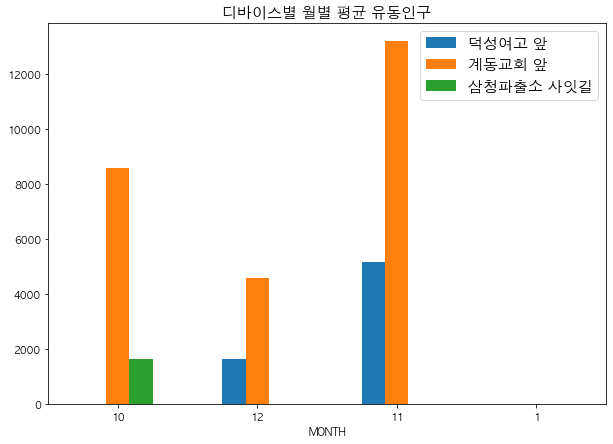

In [173]:
# 시각화 - 단일 막대그래프

outcnt_mean_month.plot(x="MONTH", y=['덕성여고 앞','계동교회 앞','삼청파출소 사잇길'], kind="bar",figsize=(10,7))
plt.title("디바이스별 월별 평균 유동인구",fontsize=15)   
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

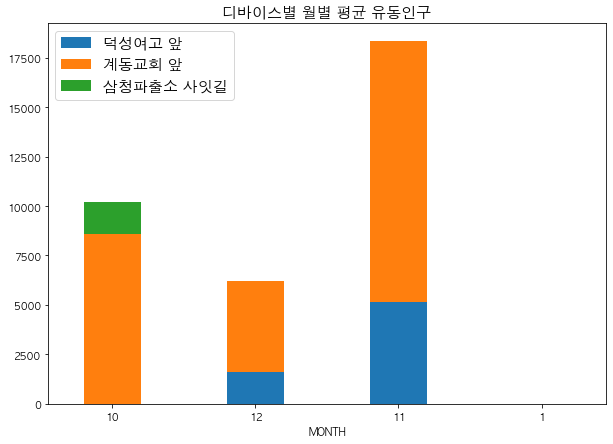

In [167]:
# 시각화 - 누적 막대그리프

outcnt_mean_month.plot(x="MONTH", y=['덕성여고 앞','계동교회 앞','삼청파출소 사잇길'], kind="bar",
                       figsize=(10,7),width=0.4, stacked=True)
plt.title("디바이스별 월별 평균 유동인구",fontsize=15)   
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

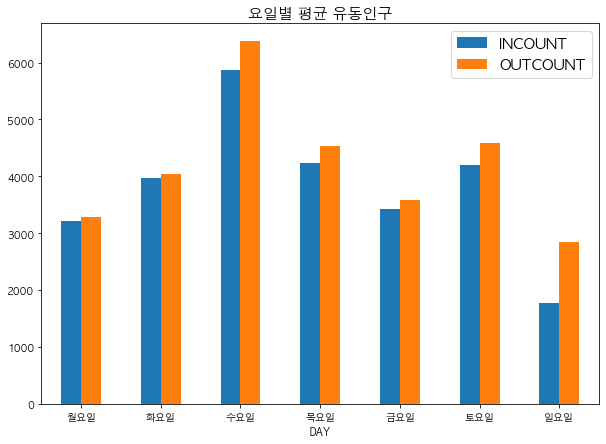

In [215]:
# 요일별 평균 유동인구

day_incnt = df_cleaned.groupby('DAY')['INCOUNT'].mean()
day_outcnt = df_cleaned.groupby('DAY')['OUTCOUNT'].mean()
day_cnt = pd.merge(day_incnt,day_outcnt,on="DAY",how="outer")
day_cnt = day_cnt.reset_index()
day_cnt = day_cnt.reindex(index=[3,6,2,1,0,5,4])


day_cnt.plot(x="DAY", y=['INCOUNT','OUTCOUNT'], kind="bar",figsize=(10,7))
plt.title("요일별 평균 유동인구",fontsize=15)   
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

In [198]:
# 요일별 평균 유동인구 + 디바이스별

df1_day = df_1.groupby('DAY')['OUTCOUNT'].mean()
df2_day = df_2.groupby('DAY')['OUTCOUNT'].mean()
df4_day = df_4.groupby('DAY')['OUTCOUNT'].mean()

outcnt_mean_day = pd.merge(df1_day,df2_day,on="DAY",how="outer")
outcnt_mean_day = pd.merge(outcnt_mean_day, df4_day, on="DAY",how="outer")
outcnt_mean_day.columns = ['덕성여고 앞','계동교회 앞','삼청파출소 사잇길']

outcnt_mean_day = outcnt_mean_day.replace(np.nan, 0, regex=True)
outcnt_mean_day = outcnt_mean_day.reset_index()
outcnt_mean_day = outcnt_mean_day.reindex(index=[3,5,2,1,0,5,4])

outcnt_mean_day

,DAY,덕성여고 앞,계동교회 앞,삼청파출소 사잇길
3,월요일,2370.650000,4142.000000,0.000000
5,토요일,1469.217391,7567.375000,0.000000
2,수요일,3551.891892,9192.000000,0.000000
1,목요일,913.857143,7362.938326,2177.146853
0,금요일,1691.142857,6080.281481,792.655914
5,토요일,1469.217391,7567.375000,0.000000
4,일요일,2254.400000,3384.500000,0.000000


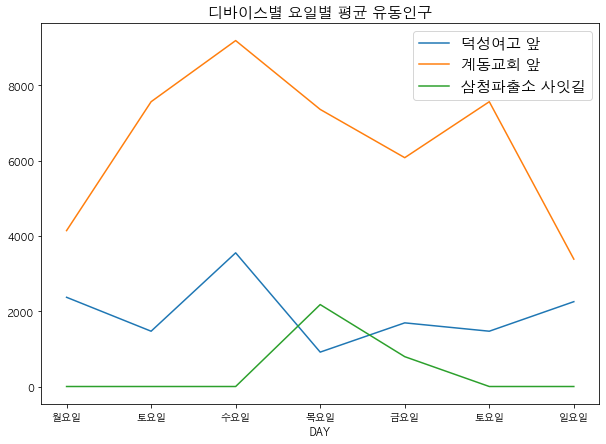

In [203]:
# 요일별 평균 유동인구 - 시각화

outcnt_mean_day.plot(x="DAY", y=['덕성여고 앞','계동교회 앞','삼청파출소 사잇길'], kind="line", figsize=(10,7))
plt.title("디바이스별 요일별 평균 유동인구",fontsize=15)   
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()

In [258]:
# 누적 시간별 유동인구 집계

df_hr = df_cleaned.groupby('HOUR')[['INCOUNT','OUTCOUNT']].mean().reset_index()
df_hr

,HOUR,INCOUNT,OUTCOUNT
0,0,47.809524,55.238095
1,1,115.804348,142.152174
2,2,168.973684,227.394737
3,3,200.350000,279.525000
4,4,227.104167,333.666667
5,5,252.466667,372.616667
6,6,332.270833,490.270833
7,7,612.354839,702.919355
8,8,1365.642857,1336.732143
9,9,2343.868421,2349.184211


In [259]:
# 시간별 유동인구 집계

for i in range(1, 24):
    df_hr.loc[i,"INCOUNT_hr"] = df_hr.loc[i, "INCOUNT"] - df_hr.loc[i-1, "INCOUNT"]
    df_hr.loc[i,"OUTCOUNT_hr"] = df_hr.loc[i, "OUTCOUNT"] - df_hr.loc[i-1, "OUTCOUNT"]

df_hr.loc[0,"INCOUNT_hr"] = df_hr.loc[0,"INCOUNT"]
df_hr.loc[0,"OUTCOUNT_hr"] = df_hr.loc[0,"OUTCOUNT"]

df_hr

,HOUR,INCOUNT,OUTCOUNT,INCOUNT_hr,OUTCOUNT_hr
0,0,47.809524,55.238095,47.809524,55.238095
1,1,115.804348,142.152174,67.994824,86.914079
2,2,168.973684,227.394737,53.169336,85.242563
3,3,200.350000,279.525000,31.376316,52.130263
4,4,227.104167,333.666667,26.754167,54.141667
5,5,252.466667,372.616667,25.362500,38.950000
6,6,332.270833,490.270833,79.804167,117.654167
7,7,612.354839,702.919355,280.084005,212.648522
8,8,1365.642857,1336.732143,753.288018,633.812788
9,9,2343.868421,2349.184211,978.225564,1012.452068


/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


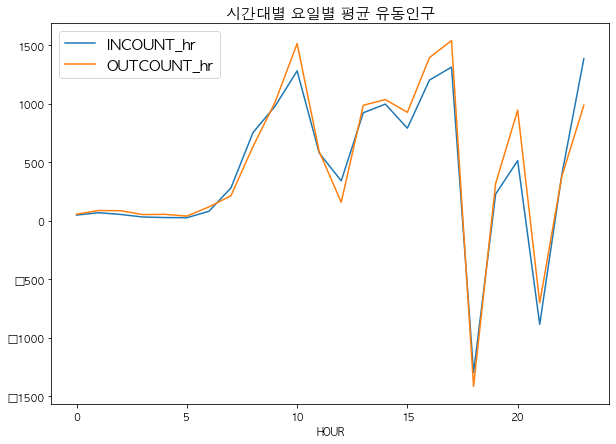

In [260]:
# 시각화

df_hr.plot(x="HOUR", y=['INCOUNT_hr','OUTCOUNT_hr'], kind="line", figsize=(10,7))
plt.title("시간대별 요일별 평균 유동인구",fontsize=15)   
plt.xticks(rotation=0)
plt.legend(fontsize=15)
plt.show()